In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import re
import collections
from scipy.optimize import curve_fit

%matplotlib inline

In [161]:
data = sorted(glob.glob("*.csv"))
array = np.zeros((9,9))
zip_file = []
values = []

for i in data:
    vals = pd.read_csv(i)['0'].tolist()
    counter = collections.Counter(vals)

    if 'extinct' in counter:
        array
        zip_file.append((float(i[6:11]), float(i[17:22]), float(0.0001)))
        values.append(0)
    else:
        zip_file.append((float(i[6:11]), float(i[17:22]), counter['u'] + counter['b']))
        values.append(counter['u'] + counter['b'])

In [162]:
values_array = np.array(values).reshape(9,9)
values_array = values_array.astype('float64') 

In [163]:
values_array[values_array < 1] = 0.01
values_array

array([[5.499000e+03, 4.000000e+01, 1.000000e-02, 1.000000e-02,
        1.000000e-02, 1.000000e-02, 1.000000e-02, 1.000000e-02,
        1.000000e-02],
       [6.796120e+05, 4.647000e+03, 1.700000e+01, 1.000000e-02,
        1.000000e-02, 1.000000e-02, 1.000000e-02, 1.000000e-02,
        1.000000e-02],
       [2.027080e+06, 6.796020e+05, 4.775000e+03, 5.700000e+01,
        1.000000e-02, 1.000000e-02, 1.000000e-02, 1.000000e-02,
        1.000000e-02],
       [2.069634e+06, 2.057577e+06, 6.974590e+05, 4.943000e+03,
        2.400000e+01, 1.000000e-02, 1.000000e-02, 1.000000e-02,
        1.000000e-02],
       [2.036606e+06, 2.023993e+06, 2.133947e+06, 6.617470e+05,
        4.580000e+03, 2.400000e+01, 1.000000e-02, 1.000000e-02,
        1.000000e-02],
       [2.037175e+06, 2.377989e+06, 2.037684e+06, 2.045980e+06,
        6.445900e+05, 5.934000e+03, 9.000000e+01, 1.000000e-02,
        1.000000e-02],
       [2.078347e+06, 2.050420e+06, 2.077187e+06, 2.065392e+06,
        2.159473e+06, 6.257490

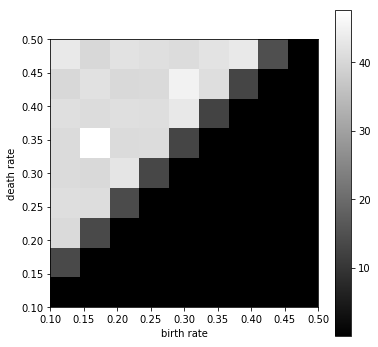

In [164]:
plt.figure(figsize = (6,6))
plt.imshow(values_array/50000, cmap = 'gray', origin = 'lower', extent = [0.10 , 0.50, 0.10 , 0.50])
plt.xlabel('birth rate')
plt.ylabel('death rate')
plt.colorbar()
plt.show()

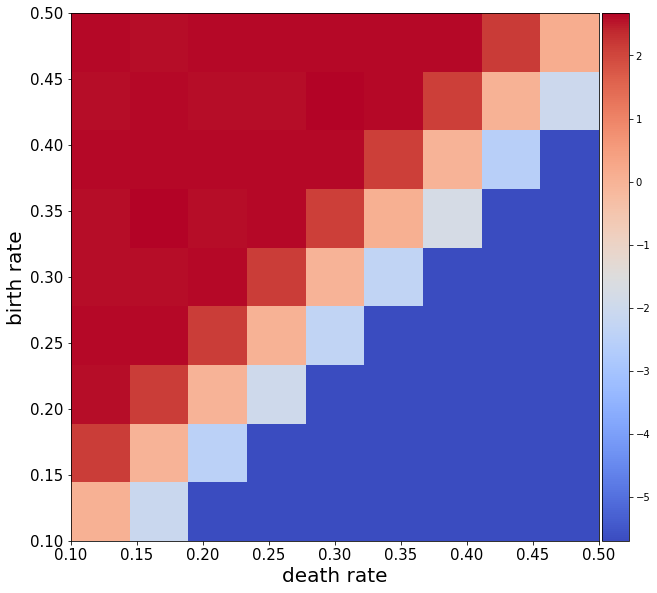

In [170]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

plt.figure(figsize = (10,10))
ax = plt.gca()
im = ax.imshow(np.log10(values_array/5000), origin = 'lower', cmap = 'coolwarm', extent = [0.1 , 0.5, 0.1 , 0.5])
#im = ax.imshow(values_array/5000, origin = 'lower', cmap = 'coolwarm', extent = [0.10 , 0.50, 0.10 , 0.50])
plt.xlabel('death rate', fontsize = 20)
plt.ylabel('birth rate', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
plt.savefig('birth and death.png', bbox_inches = 'tight')
plt.show()